In [1]:
# import networkx
import lovelyplots
import networkx as nx
import numpy as np
import rustworkx as rx
import scienceplots
from rustworkx.visualization import graphviz_draw, mpl_draw
from scipy.optimize import minimize

from corral_crowding.allocation_optimizer import GateFidelityOptimizer
from corral_crowding.detuning_fit import compute_infidelity_parameters, decay_fit
from corral_crowding.module_graph import QuantumModuleGraph

In [ ]:
(1.762933e-02 - 8.803200e-02) / 8.803200e-02

-0.7997395265358052

Qubit Frequencies: [3.33, 5.7, 4.04, 5.3] GHz
SNAIL Frequency: 4.69 GHz
Gate Infidelities:
  Gate ('Q0', 'Q1'): 2.370000 GHz → Infidelity (no lifetime loss): 7.112576e-03, Infidelity (with lifetime loss): 1.218879e-02
  Gate ('Q0', 'Q2'): 0.710000 GHz → Infidelity (no lifetime loss): 2.738738e-01, Infidelity (with lifetime loss): 2.749592e-01
  Gate ('Q0', 'Q3'): 1.970000 GHz → Infidelity (no lifetime loss): 8.283284e-02, Infidelity (with lifetime loss): 8.590528e-02
  Gate ('Q1', 'Q2'): 1.660000 GHz → Infidelity (no lifetime loss): 5.137740e-01, Infidelity (with lifetime loss): 5.150218e-01
  Gate ('Q1', 'Q3'): 0.400000 GHz → Infidelity (no lifetime loss): 3.272314e-02, Infidelity (with lifetime loss): 3.399558e-02
  Gate ('Q2', 'Q3'): 1.260000 GHz → Infidelity (no lifetime loss): 9.053798e-02, Infidelity (with lifetime loss): 9.233077e-02

Average Gate Infidelity (no lifetime loss): 7.913580e-02
Average Gate Infidelity (with lifetime loss): 8.803200e-02


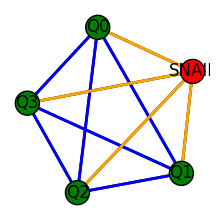

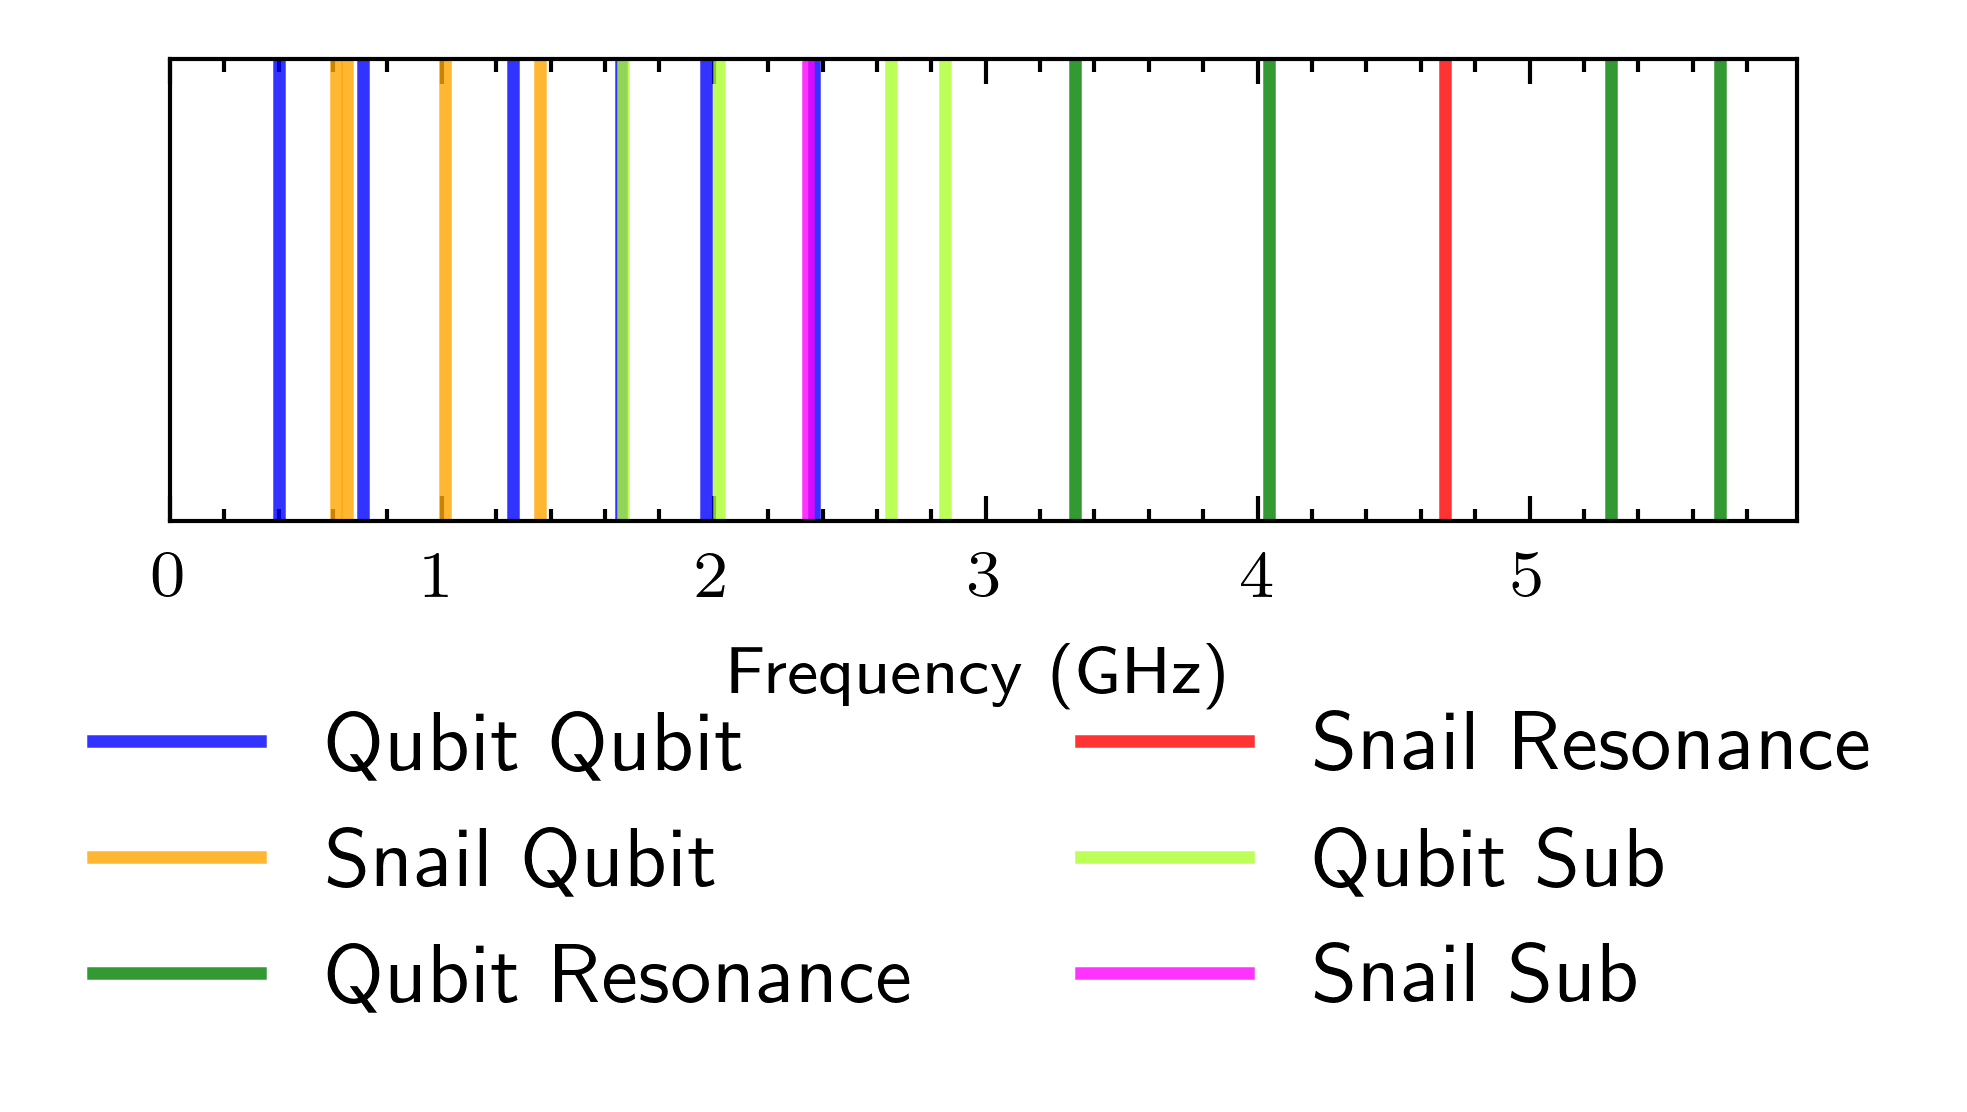

In [24]:
# baseline from Israa+Gaurav initial designs
module = QuantumModuleGraph(num_qubits=4)
optimizer = GateFidelityOptimizer(
    module,
    min_bare_space_ghz=0.2,
    lambdaq=0.08,
    eta=1.8,
    g3=60e6,
    qubit_bounds=(3.3, 5.7),
    snail_bounds=(4.2, 4.7),
    use_lifetime=True,
)
optimizer.best_frequencies = [3.33, 5.70, 4.04, 5.3, 4.69]
optimizer.report_results()

100%|██████████| 64/64 [00:20<00:00,  3.10it/s]

Optimization terminated successfully.
Qubit Frequencies: [3.8135459  5.5652535  5.3652534  4.13354601] GHz
SNAIL Frequency: 4.696859922365948 GHz
Gate Infidelities:
  Gate ('Q0', 'Q1'): 1.751708 GHz → Infidelity (no lifetime loss): 1.386032e-02, Infidelity (with lifetime loss): 1.657164e-02
  Gate ('Q0', 'Q2'): 1.551708 GHz → Infidelity (no lifetime loss): 7.907833e-03, Infidelity (with lifetime loss): 1.025586e-02
  Gate ('Q0', 'Q3'): 0.320000 GHz → Infidelity (no lifetime loss): 2.460346e-02, Infidelity (with lifetime loss): 2.584647e-02
  Gate ('Q1', 'Q2'): 0.200000 GHz → Infidelity (no lifetime loss): 1.307517e-02, Infidelity (with lifetime loss): 1.427875e-02
  Gate ('Q1', 'Q3'): 1.431707 GHz → Infidelity (no lifetime loss): 9.114721e-03, Infidelity (with lifetime loss): 1.127914e-02
  Gate ('Q2', 'Q3'): 1.231707 GHz → Infidelity (no lifetime loss): 1.737106e-02, Infidelity (with lifetime loss): 1.927311e-02

Average Gate Infidelity (no lifetime loss): 1.331907e-02
Average Gate In

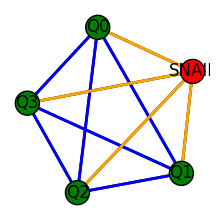

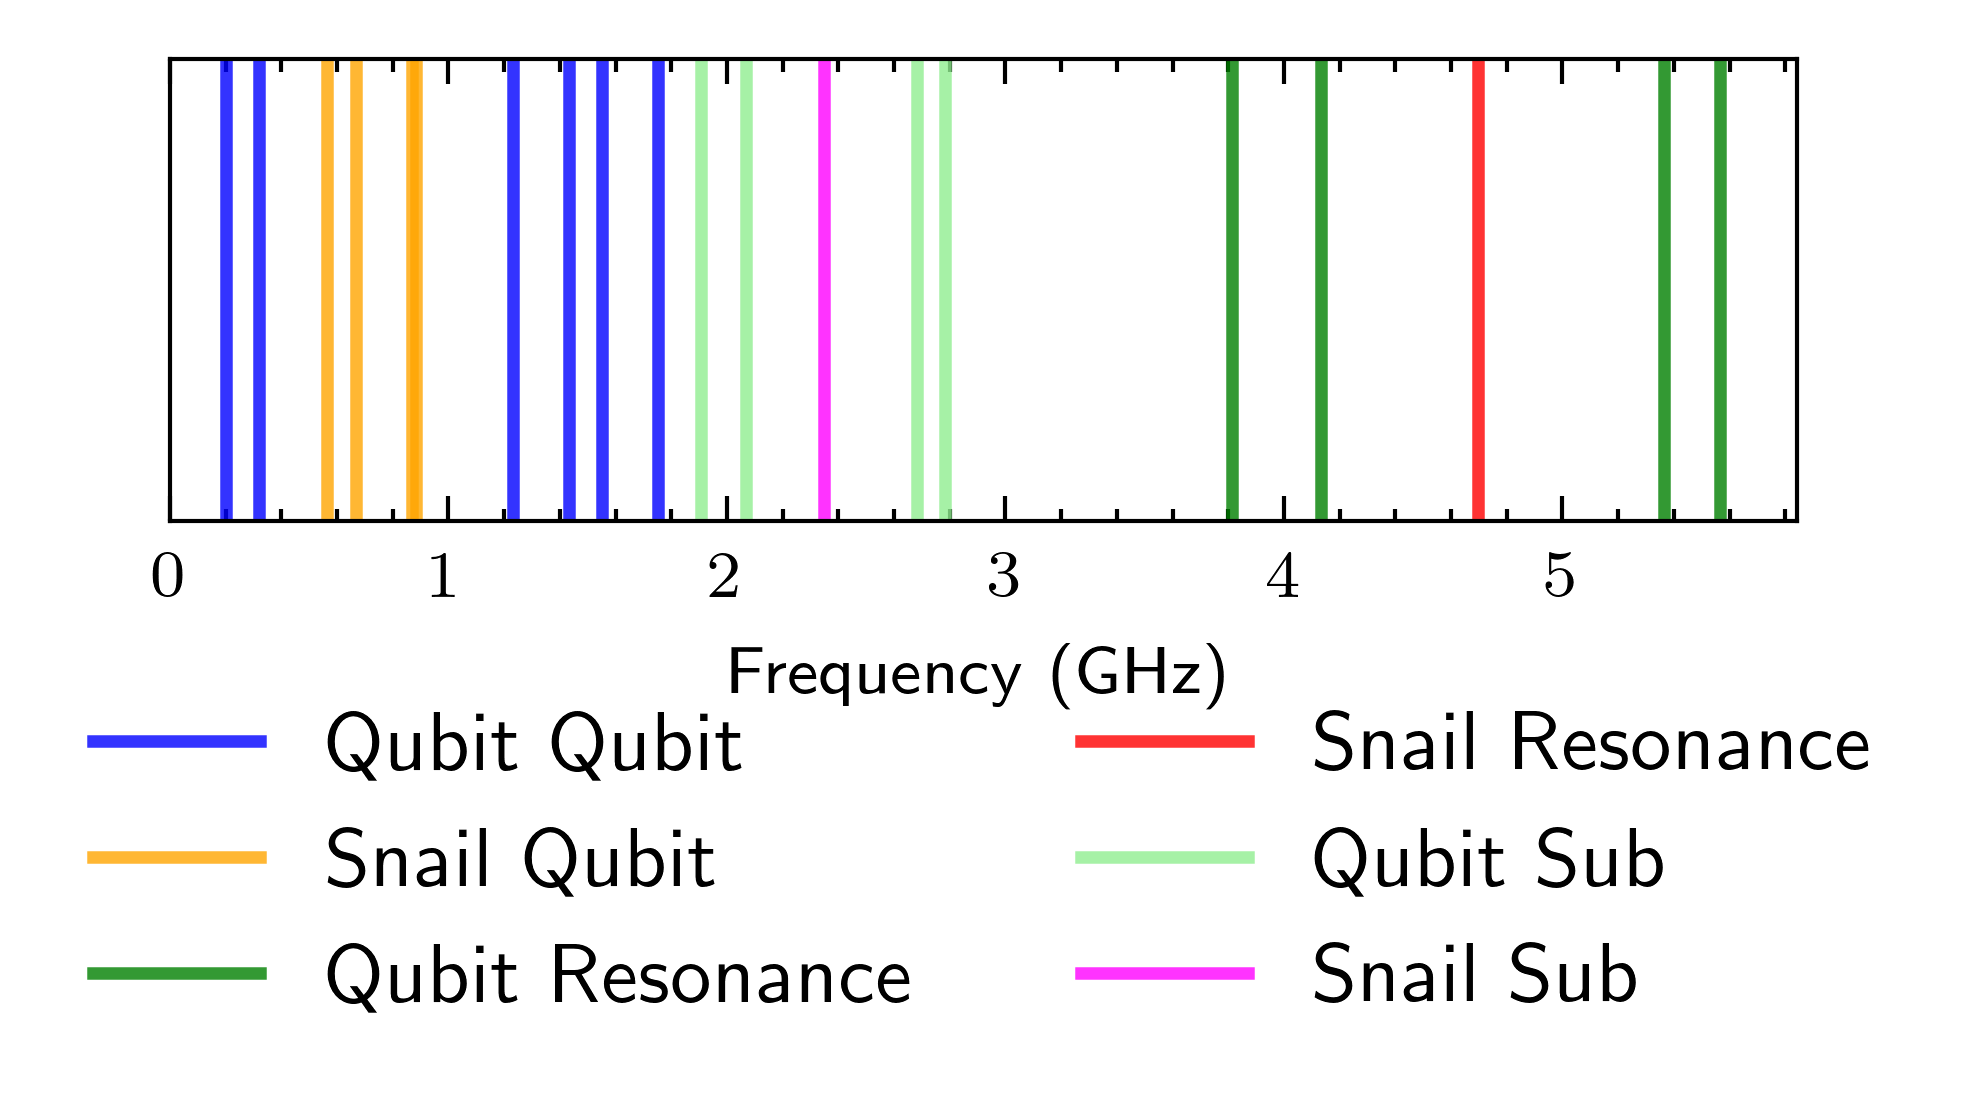

In [20]:
module = QuantumModuleGraph(num_qubits=4)
optimizer = GateFidelityOptimizer(
    module,
    min_bare_space_ghz=0.2,
    lambdaq=0.08,
    eta=1.8,
    g3=60e6,
    qubit_bounds=(3.3, 5.7),
    snail_bounds=(4.2, 4.7),
    use_lifetime=True,
)
opt_frequencies, opt_cost = optimizer.optimize_frequencies()
optimizer.report_results()

Remaining standard module sizes:

100%|██████████| 64/64 [00:00<00:00, 180.57it/s]


Optimization terminated successfully.
Qubit Frequencies: [5.49999812 5.69999954] GHz
SNAIL Frequency: 4.200000000000001 GHz
Gate Infidelities:
  Gate ('Q0', 'Q1'):0.200001 GHz → Infidelity: 0.001176

Average Gate Infidelity: 0.001176


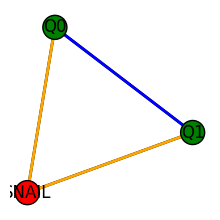

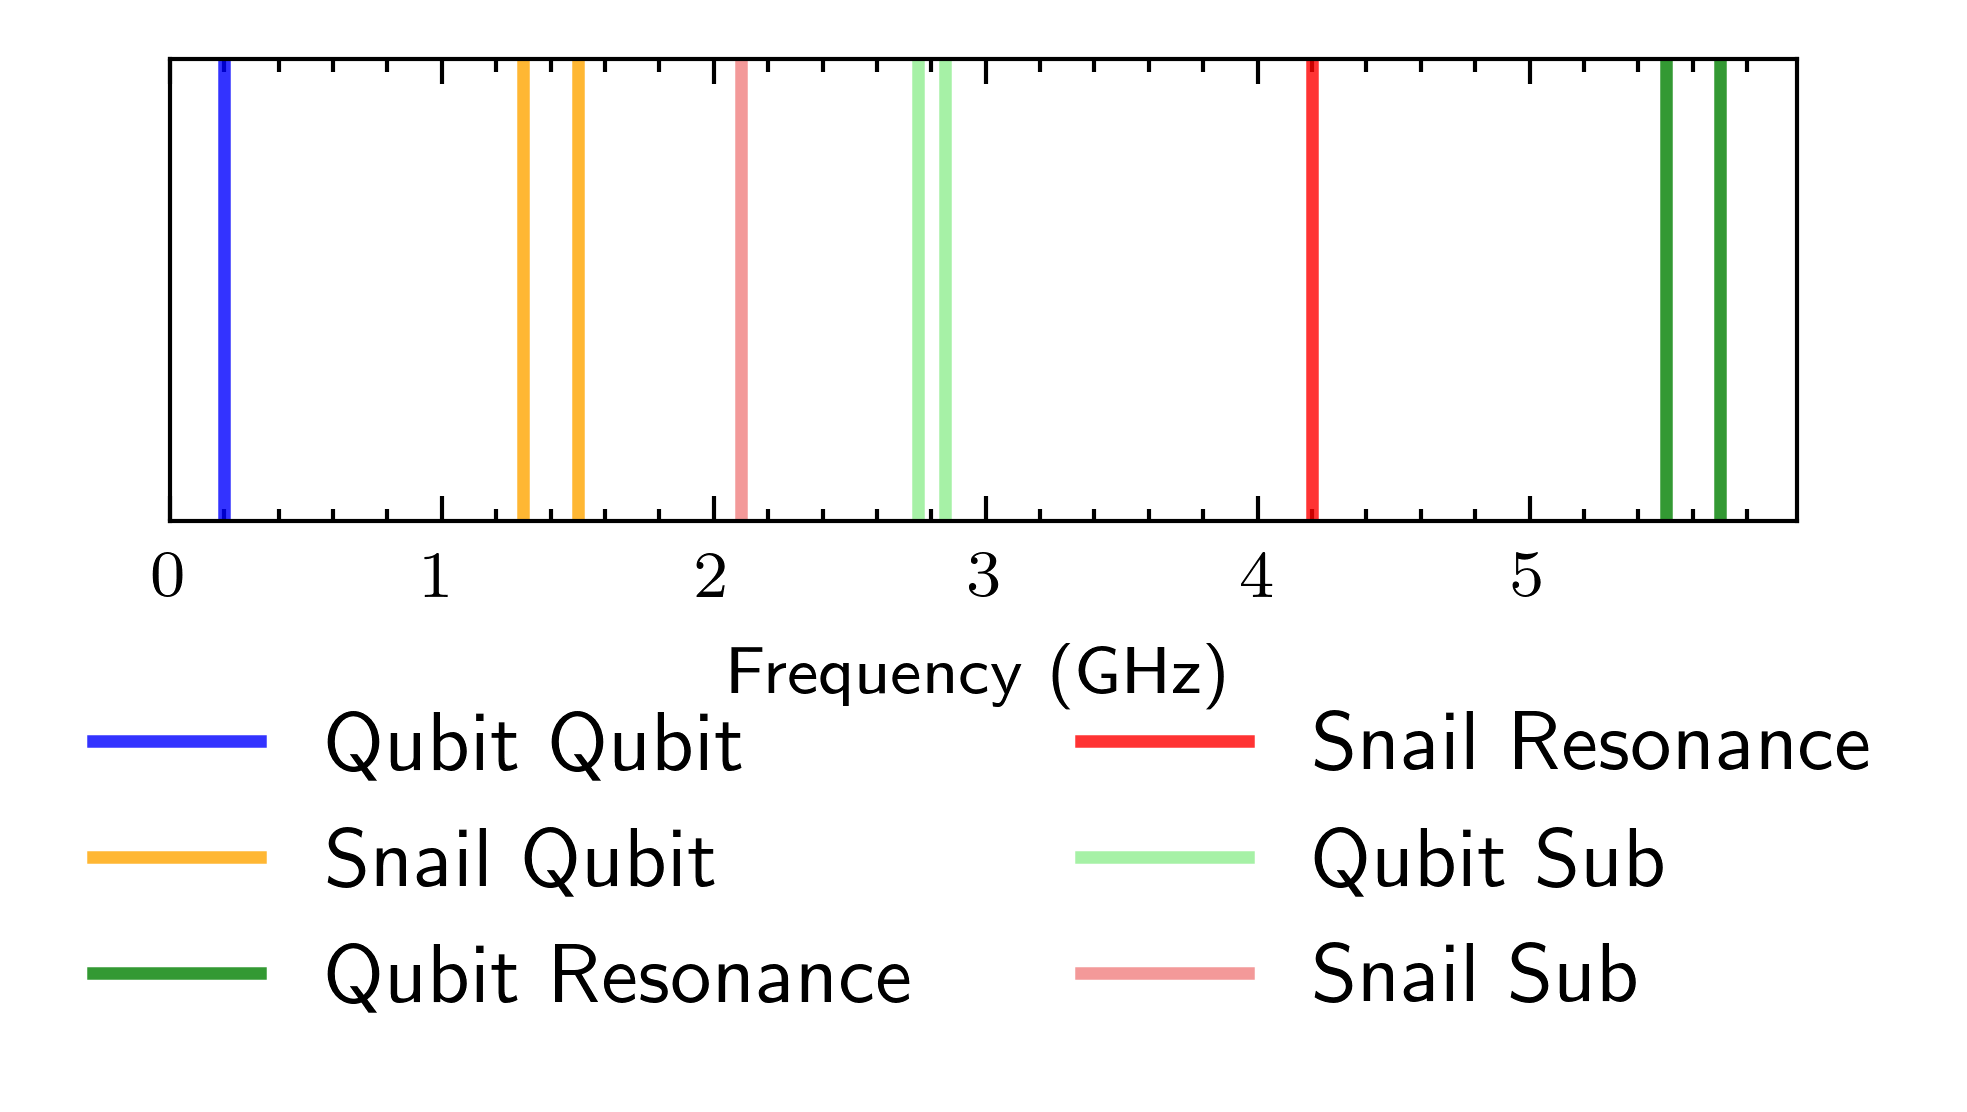

In [10]:
module = QuantumModuleGraph(num_qubits=2)
optimizer = GateFidelityOptimizer(
    module,
    min_bare_space_ghz=0.2,
    lambdaq=0.08,
    eta=1.8,
    g3=60e6,
    qubit_bounds=(3.3, 5.7),
    snail_bounds=(4.2, 4.7),
)
opt_frequencies, opt_cost = optimizer.optimize_frequencies()
optimizer.report_results()

100%|██████████| 64/64 [00:01<00:00, 35.78it/s]

Optimization terminated successfully.
Qubit Frequencies: [5.6918856  5.49188559 3.30874235] GHz
SNAIL Frequency: 4.460990050463199 GHz
Gate Infidelities:
  Gate ('Q0', 'Q1'):0.200000 GHz → Infidelity: 0.002897
  Gate ('Q0', 'Q2'):2.383143 GHz → Infidelity: 0.004359
  Gate ('Q1', 'Q2'):2.183143 GHz → Infidelity: 0.004001

Average Gate Infidelity: 0.003697


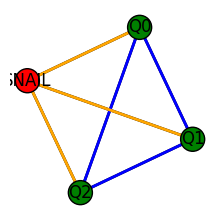

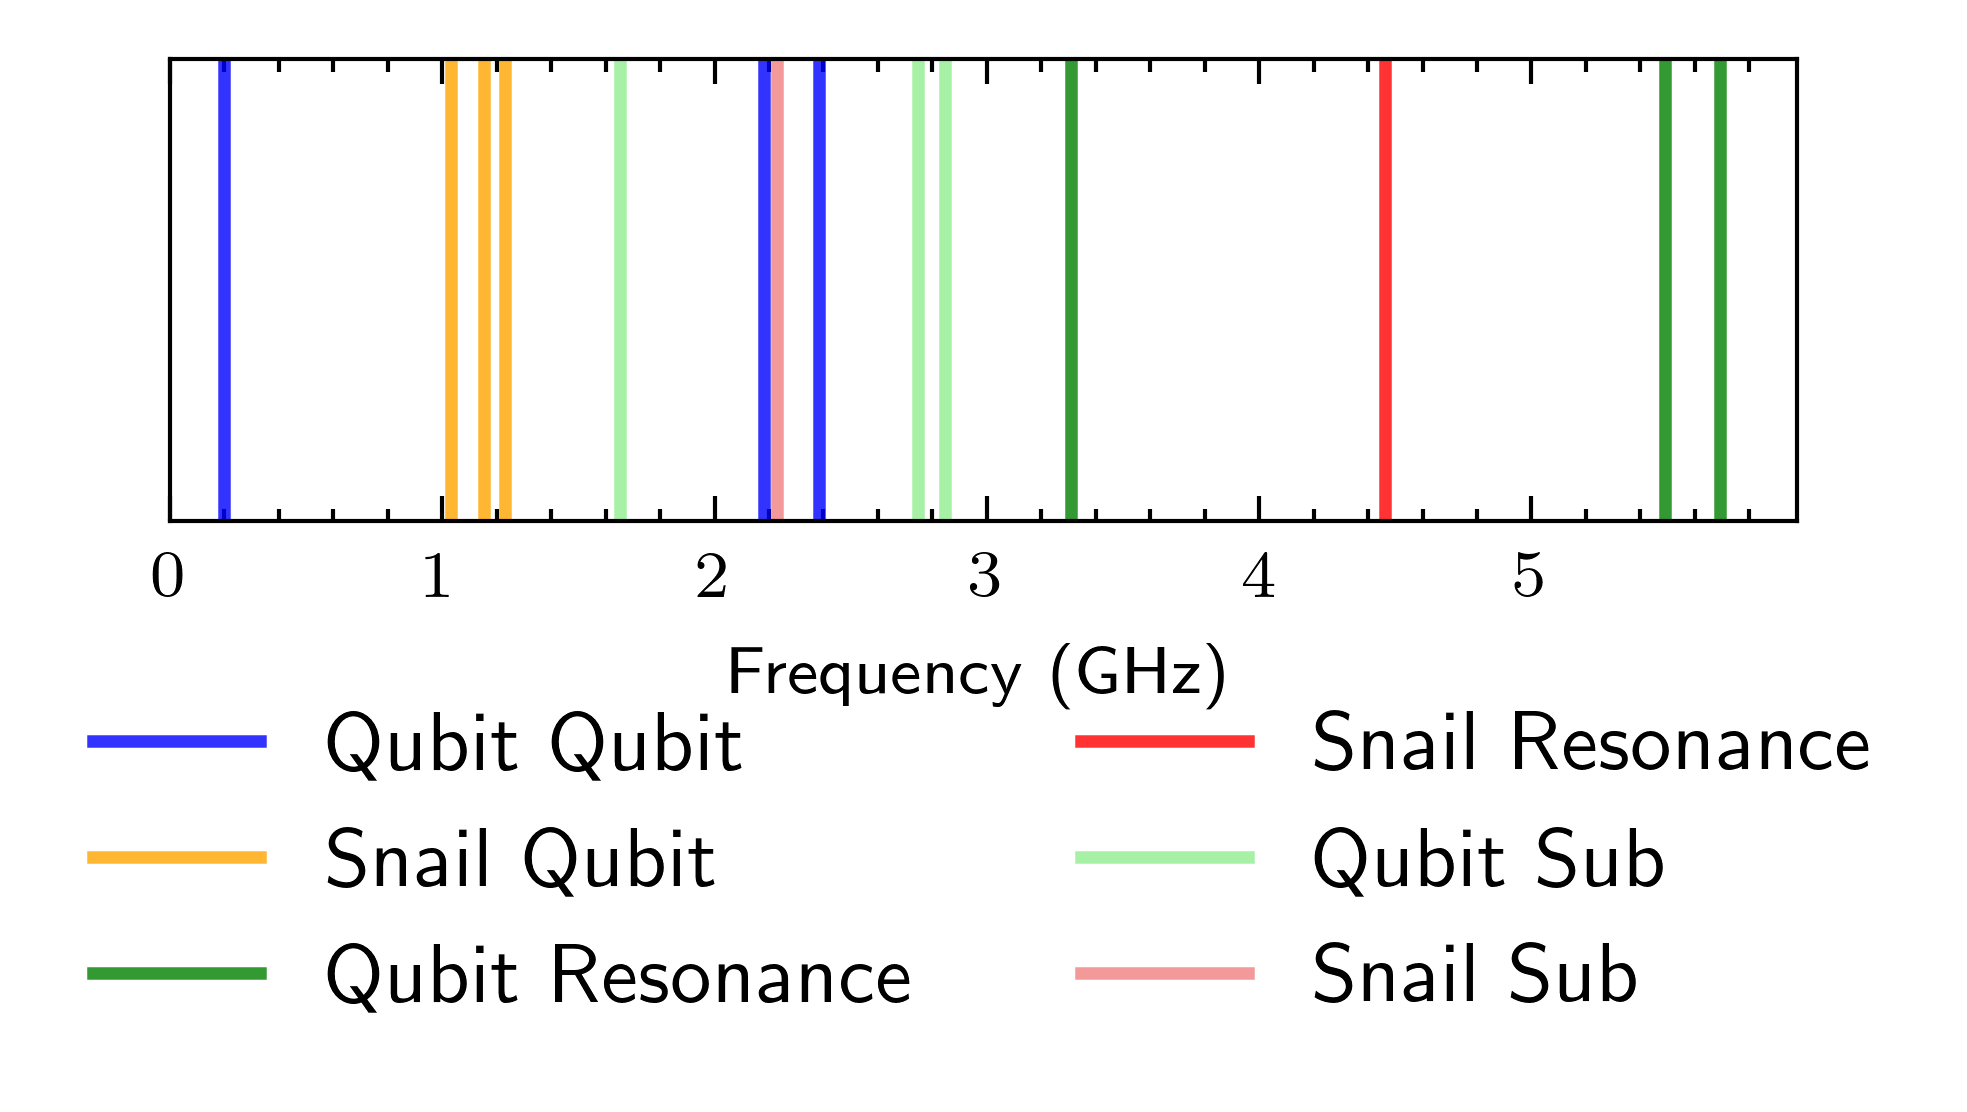

In [11]:
module = QuantumModuleGraph(num_qubits=3)
optimizer = GateFidelityOptimizer(
    module,
    min_bare_space_ghz=0.2,
    lambdaq=0.08,
    eta=1.8,
    g3=60e6,
    qubit_bounds=(3.3, 5.7),
    snail_bounds=(4.2, 4.7),
)
opt_frequencies, opt_cost = optimizer.optimize_frequencies()
optimizer.report_results()

100%|██████████| 64/64 [00:14<00:00,  4.37it/s]

Optimization terminated successfully.
Qubit Frequencies: [3.60845365 5.21067723 5.03105055 5.63078274 3.3083482 ] GHz
SNAIL Frequency: 4.310154143209708 GHz
Gate Infidelities:
  Gate ('Q0', 'Q1'):1.602224 GHz → Infidelity: 0.091579
  Gate ('Q0', 'Q2'):1.422597 GHz → Infidelity: 0.085762
  Gate ('Q0', 'Q3'):2.022329 GHz → Infidelity: 0.011262
  Gate ('Q0', 'Q4'):0.300105 GHz → Infidelity: 0.014114
  Gate ('Q1', 'Q2'):0.179627 GHz → Infidelity: 0.009124
  Gate ('Q1', 'Q3'):0.420106 GHz → Infidelity: 0.025289
  Gate ('Q1', 'Q4'):1.902329 GHz → Infidelity: 0.029825
  Gate ('Q2', 'Q3'):0.599732 GHz → Infidelity: 0.135464
  Gate ('Q2', 'Q4'):1.722702 GHz → Infidelity: 0.079983
  Gate ('Q3', 'Q4'):2.322435 GHz → Infidelity: 0.011983

Average Gate Infidelity: 0.031970


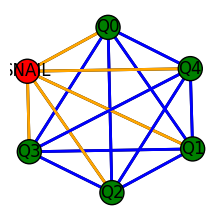

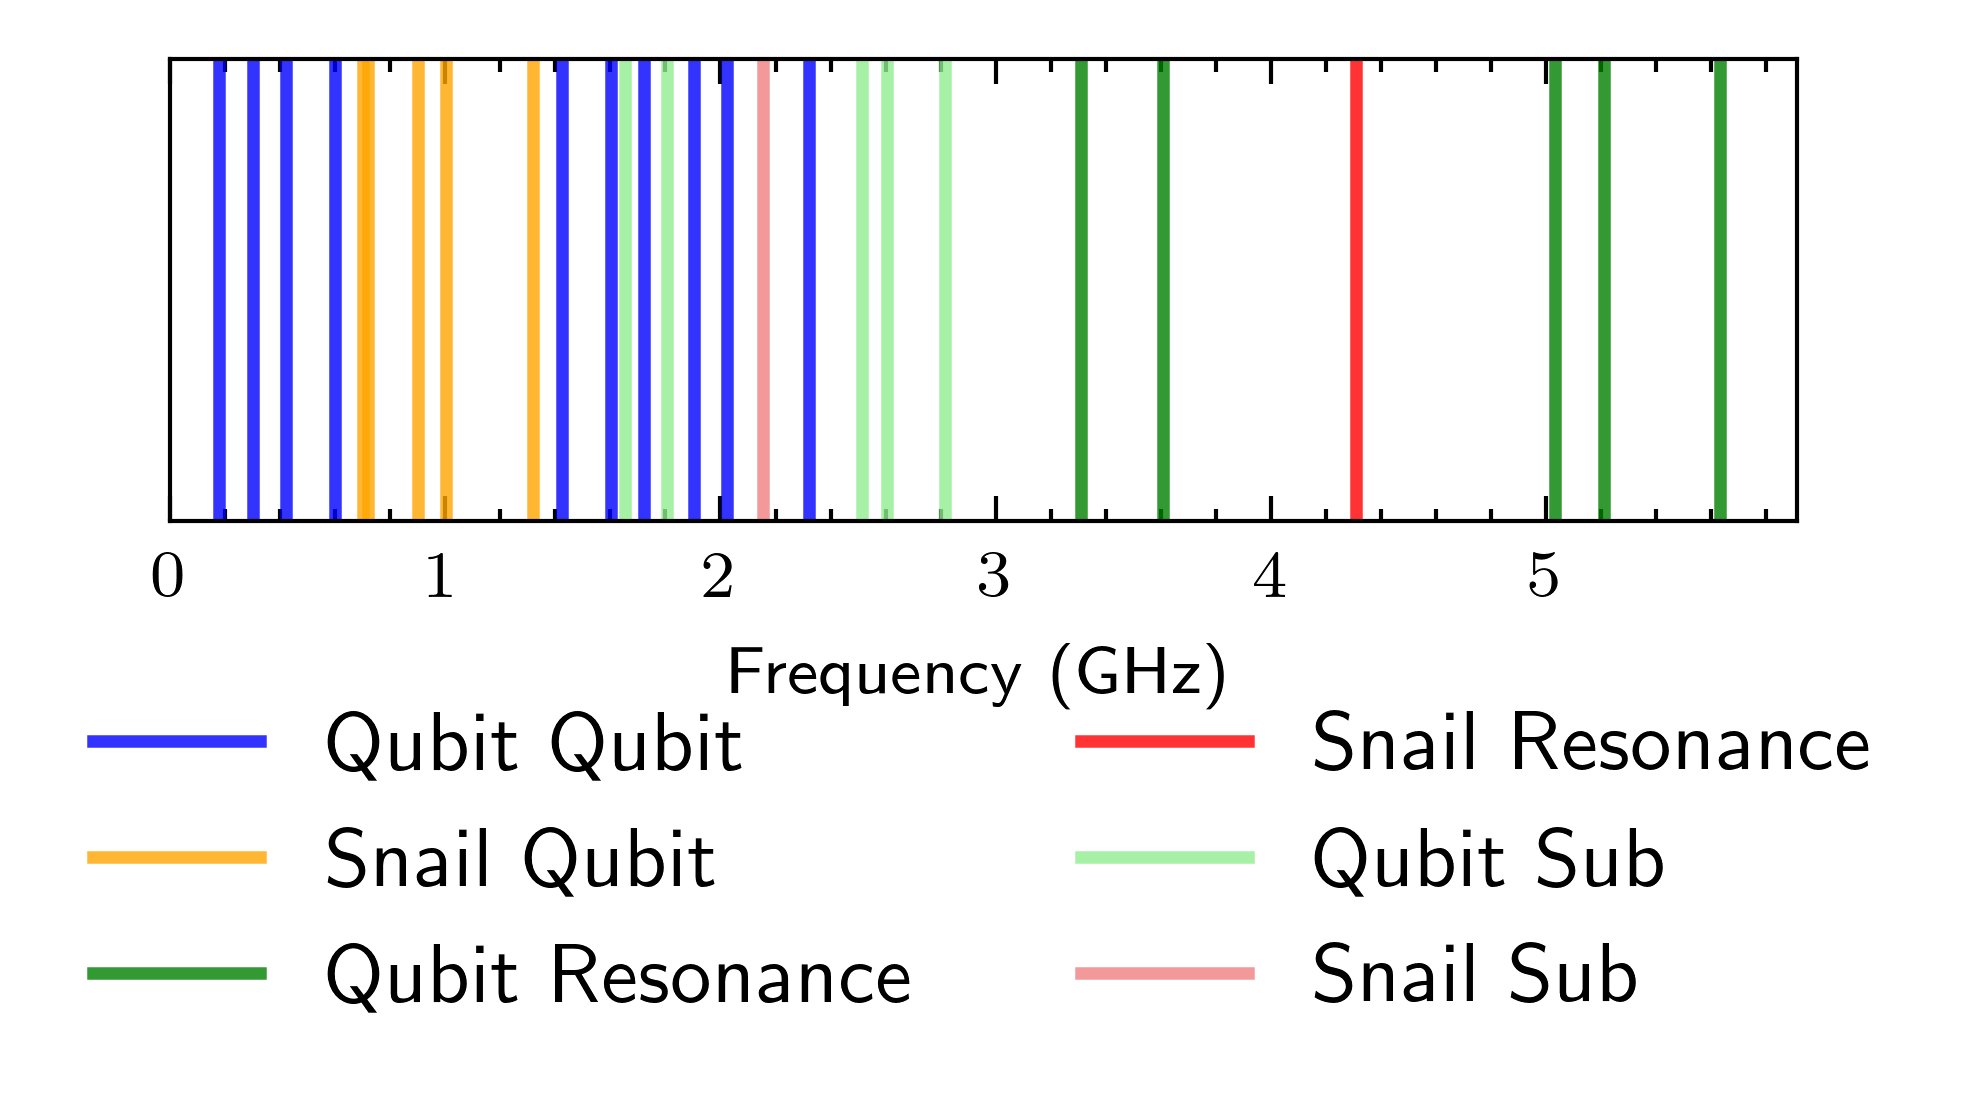

In [12]:
module = QuantumModuleGraph(num_qubits=5)
optimizer = GateFidelityOptimizer(
    module,
    min_bare_space_ghz=0.2,
    lambdaq=0.08,
    eta=1.8,
    g3=60e6,
    qubit_bounds=(3.3, 5.7),
    snail_bounds=(4.2, 4.7),
)
opt_frequencies, opt_cost = optimizer.optimize_frequencies()
optimizer.report_results()